**Titanic Dataset Analysis**

***Step 1: Import required libraries***


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Step 2: Load the Titanic dataset*** 

In [7]:
df = pd.read_csv(r'C:\Users\admin\Documents\ISHA\Minecraft\Titanic-Dataset.csv')
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


***Step3: Basic dataset Information***

In [6]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

***Step 4: Data Cleaning***


##### Fill missing Age values with median age


In [18]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True, errors='ignore')

print("\nMissing values AFTER cleaning:")
print(df.isnull().sum())

print("\nColumns after cleaning:")
print(df.columns)


Missing values AFTER cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Columns after cleaning:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


***Step 5: Analysis Questions***

##### 1. Who survived more: males or females?

In [24]:
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("\nSurvival rate by gender:\n", survival_by_gender)



Survival rate by gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


##### 2. Did passenger class affect survival chances?

In [25]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival rate by passenger class:\n", survival_by_class)



Survival rate by passenger class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


##### 3. Survival rate by age group

In [26]:
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

survival_by_age = df.groupby('AgeGroup', observed=True)['Survived'].mean()
print("\nSurvival rate by age group:\n", survival_by_age)


Survival rate by age group:
 AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64


***Step 6: Visualizations***

##### Bar chart: Survival by gender

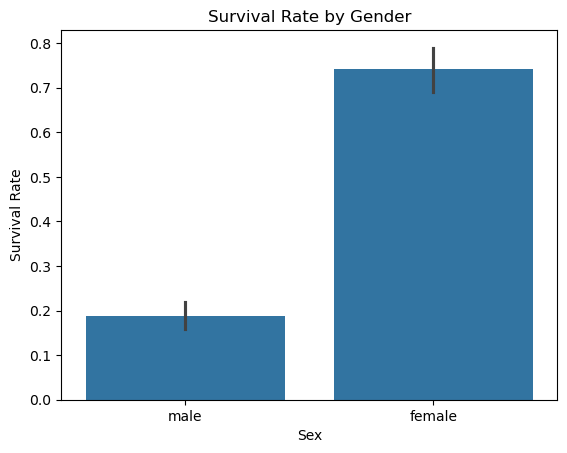

In [21]:
plt.figure()
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

##### Bar chart: Survival by passenger class

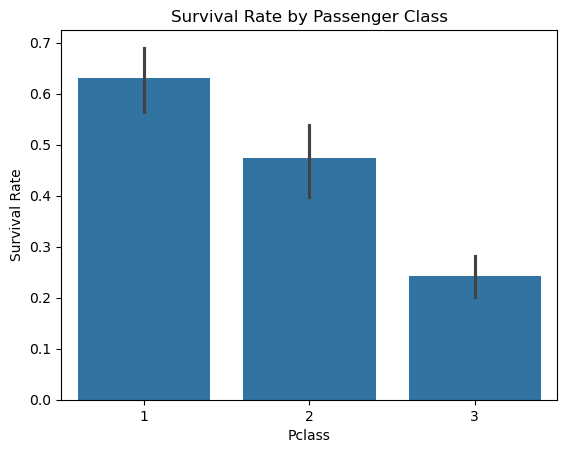

In [27]:
plt.figure()
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

##### Histogram: Passenger age distribution

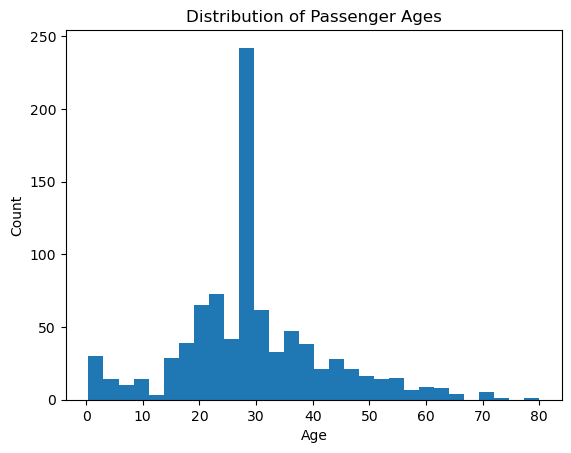

In [23]:
plt.figure()
plt.hist(df['Age'], bins=30)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

***Step 7: Conclusion***

Females had a higher survival rate than males
Passengers in 1st class had better survival chances
Children and young adults showed relatively higher survival rates
